### k-평균 군집 알고리즘

- 데이터 포인트를 선정하고
- 데이터 포인트의 어떤 영역을 대표하는 클러스터 중심을 찾고 
- 클러스터에 할당되 데이터 포인트의 평균점에 클러스터 중심을 다시 지정한다
- 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 종료된다.

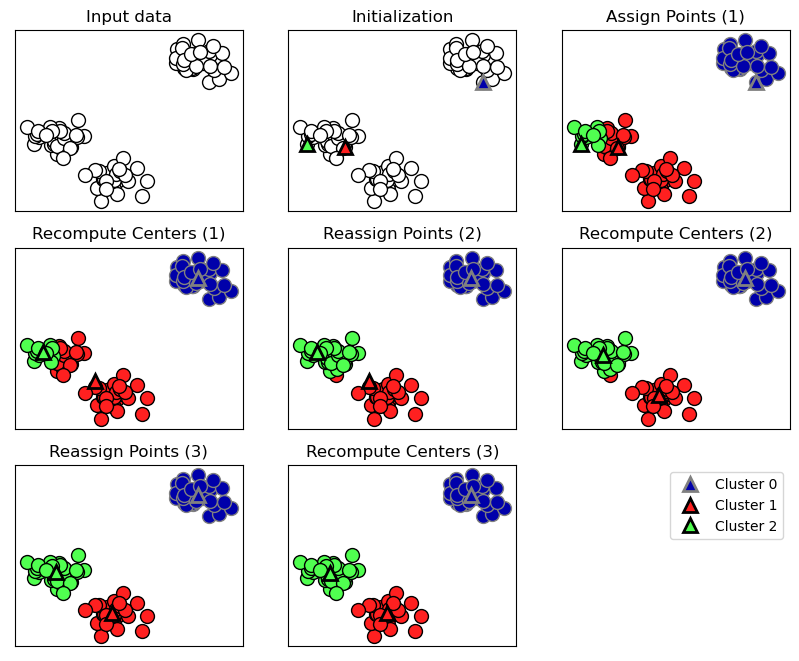

In [5]:
# library import
import mglearn
import matplotlib
import matplotlib.pyplot as plt

# matplotlib 설정
matplotlib.rc('font', family='AppleGothic') # 한글 출력
plt.rcParams['axes.unicode_minus'] = False #  축 -

mglearn.plots.plot_kmeans_algorithm()
plt.show()

1. make_blobs(인위적 데이터셋)에 k-평균 알고리즘을 적용

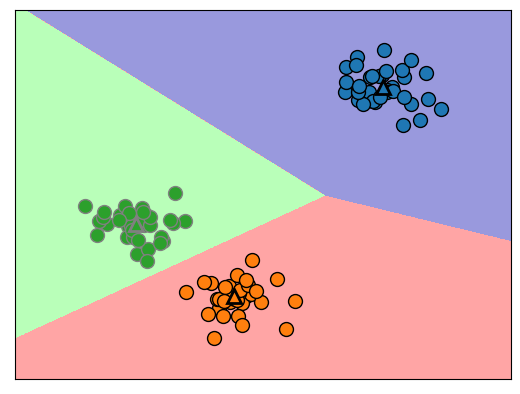

In [21]:
# 경계선 그리기
mglearn.plots.plot_kmeans_boundaries()
plt.show() 

In [2]:
# library import
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# 데이터 만들기
x, y = make_blobs(random_state=1)

# 모델 생성 및 학습
kmean = KMeans(n_clusters=3) # 클러스터 수
kmean.fit(x)

print('클러스터 레이블: \n{}'.format(kmean.labels_)) 
# 3개의 클러스터를 지정했으므로 각 클러스터는 0 ~ 2까지 번호가 붙
### predict메소드를 통해 새로운 데이터 클러스터 레이블을 예측할 수 있음
### 예측은 각 포인트에 가장 가까운 클러스터 영역으로 할당하는 것이며 기존 모델을 변경하지 않음
### 훈련 세트에 대해 predict 메소드를 실행하면 labels_와 같은 결과를 얻게 됨

print('예측 레이블: \n{}'.format(kmean.predict(x)))
### 클러스터는 각 데이터 포인트가 레이블을 가진다는 면에서 분류와 비슷함
### 그러나 정답을 모르고 있으며 레이블 자체에 의미가 없음
### 알고리즘이 우리에게 주는 정보는 각 레이블에 속한 데이터는 서로 비슷하다는 것

클러스터 레이블: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
예측 레이블: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


2. make_blobs 데이터로 그래프 그리기

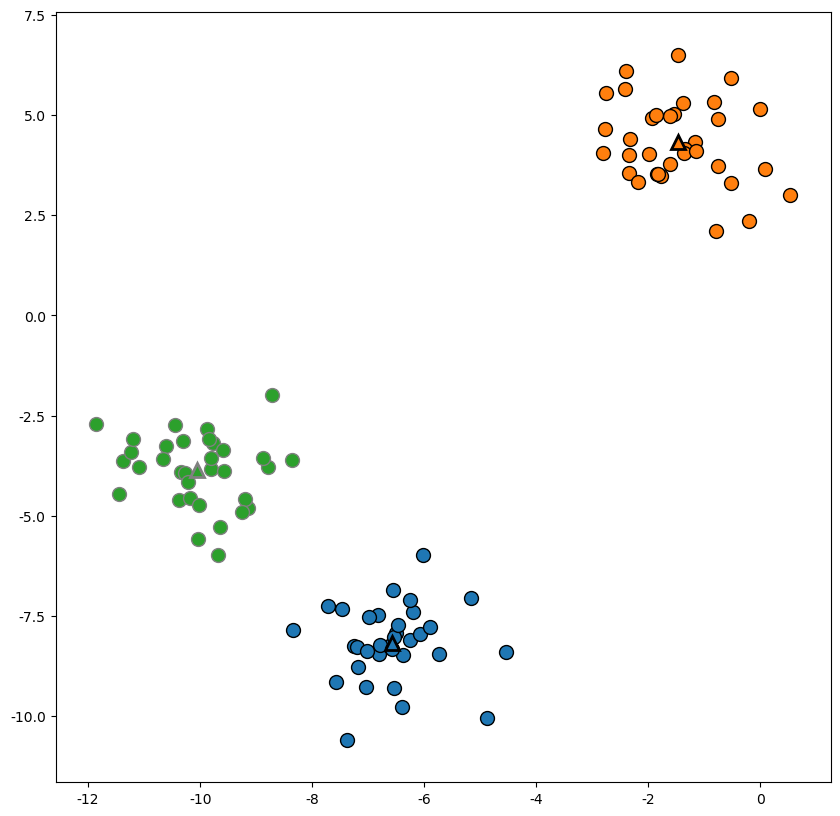

In [23]:
plt.figure(figsize=(10,10))

mglearn.discrete_scatter(x[:, 0], x[:, 1], kmean.labels_, markers= 'o') # x, y, group, marker

mglearn.discrete_scatter(
    kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1],
    y=np.unique(kmean.labels_),# x, y, group
    markers='^', markeredgewidth=2) # marker, 두께

plt.show()

3. 클러스터수를 변경하여 비교

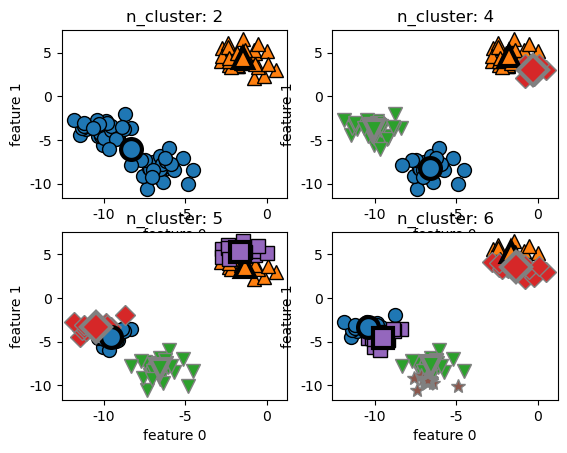

In [33]:
# fig = plt.figure(figsize=(10,10))
fig, axes = plt.subplots(2, 2,  
                         gridspec_kw={
                           'width_ratios': [5, 5],
                           'height_ratios': [5, 5]}
                         ) 
# gridspec_kw: 그래프 수평간격

n_clusters_set = [2, 4, 5, 6] 

for n, ax in zip(n_clusters_set, axes.ravel()):
    kmeans = KMeans(n_clusters=n) # 클러스터 갯수
    kmeans.fit(x)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y=kmeans.labels_, ax=ax) # x, y, group, ax = plot객체
    mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                             kmeans.cluster_centers_[:, 1],
                             y=np.unique(kmeans.labels_), # x, y, group
                             markeredgewidth=3, ax=ax, s=15) # 두께, 그림객체, 사이즈

    ax.set_title('n_cluster: {}'.format(n)) # title
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

plt.show()

## 4. k-평균 알고리즘이 실패하는 경우
- 데이터셋의 클러스터 갯수를 알고 있더라도 K-Mean가 항상 구분하는 것은 아니다.
- 클러스터를 정의하는 것은 __*중심*__ 하나뿐이다.
- 이런 이유로 K-Mean가 비교적 간단한 형태를 구분할 수 있는 것이다.
- 또한 K-Mean의 모든 클러스터의 반경은 동일하다고 가정하고 클러스트 중심에 경계를 그린다.

### 4-1 클러스터의 밀도가 다를 때

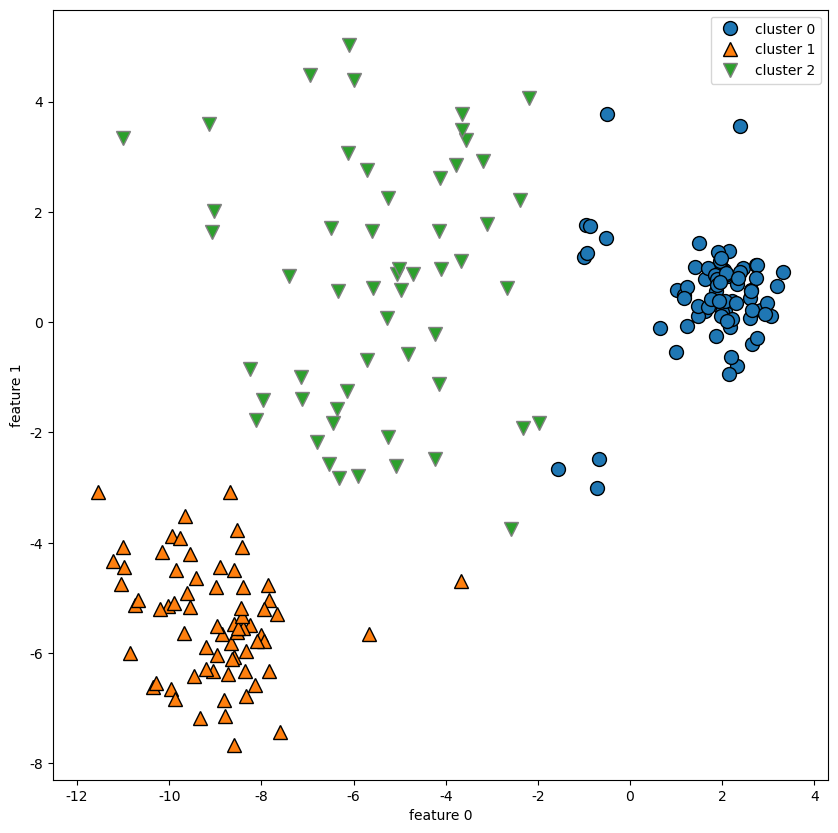

In [34]:

plt.figure(figsize=(10,10))

x1, y1 = make_blobs(n_samples=200, cluster_std=[1, 2.5, 0.5], random_state=170) # 샘플수, 밀도, 랜덤상태
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x1) # 모델 생성 및 훈련 후 예측

mglearn.discrete_scatter(x1[:, 0], x1[:, 1], y=y_pred) # x, y, group
plt.legend(['cluster 0', 'cluster 1', 'cluster 2']) # 범례
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

### 4-2 클러스터가 원형이 아닐  때
- 원형이 아닌 클러스터는 구분하지 못함!!

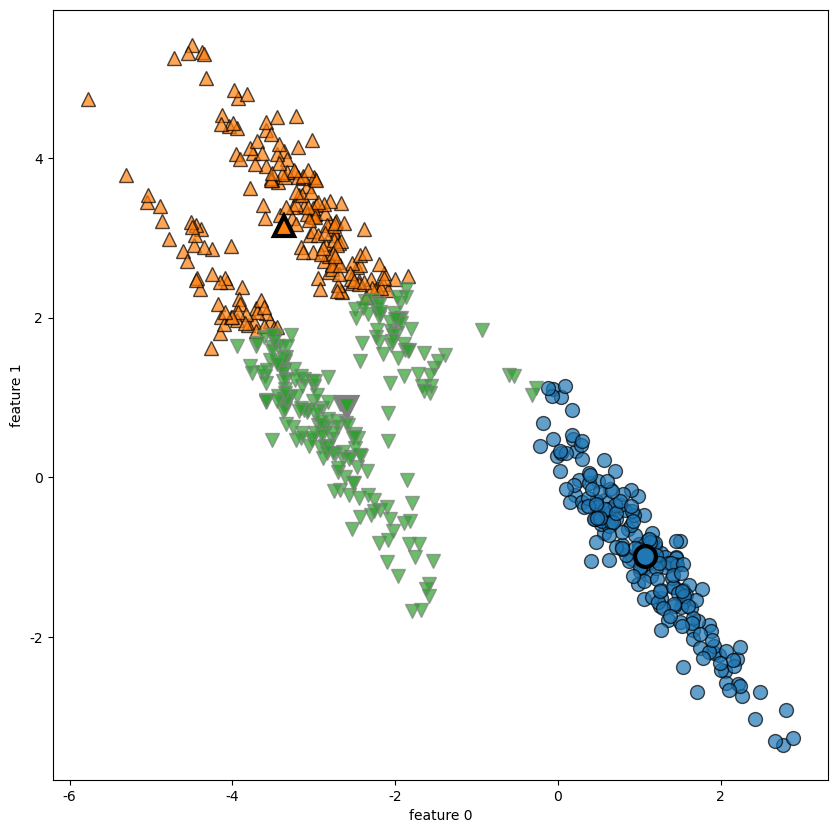

In [36]:

plt.figure(figsize=(10,10))

x2, y2 = make_blobs(n_samples=600, random_state=170) # 샘플 갯수, 램덤상태
transform = np.random.RandomState(74) 

# 랜덤상태, (2,2)size로 normal분포의 숫자 무작위추출
rng = transform.normal(size=(2,2))
x2_reshape = np.dot(x2, rng) # np.dot 행렬곱

kmeans = KMeans(n_clusters=3).fit(x2_reshape) # 모델 생성
y2_pred = kmeans.predict(x2_reshape) # 예측

mglearn.discrete_scatter(x2_reshape[:, 0], x2_reshape[:, 1],
                         y=kmeans.labels_, alpha=0.7) # x, y , group, 투명도

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    y=np.unique(kmeans.labels_), # x, y, group
    markeredgewidth=3, s=15) # 두께, size

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

### 4-3 클러스터의 구조가 복합형태를 나타낼 때
- 구조가 복잡한 반달모양의 클러스터를 구분하지 못한다.
- 2개의 반달모양을 구분하지 못하고 원형으로 데이터를 인식한다.

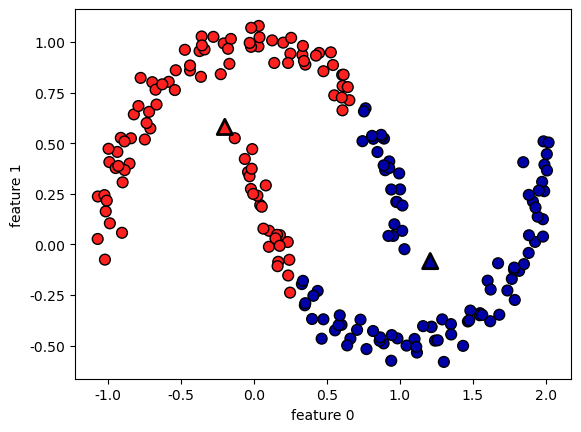

In [19]:
from sklearn.datasets import make_moons

x3, y3 = make_moons(n_samples=200, noise=0.05, random_state=0) 
                    # 갯수,         퍼짐정도,       랜덤상태
kmeans = KMeans(n_clusters=2).fit(x3) # 모델 객체 생성 및 학습
y3_pred = kmeans.predict(x3) # 모델 적용

plt.scatter(x3[:, 0], x3[:, 1], c=y3_pred, s=60, edgecolors='black', cmap=mglearn.cm2) 
            # x,        y,      group,   점크기 60%,   테두리색 black,     palette
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            # x,                            y
            marker='^', s=120, linewidth=2, edgecolors='k', c=[mglearn.cm2(0), mglearn.cm2(1)]) 
            # marker,   점크기 120%, 두께,   테두리색,          색상 

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()